#Assignment 4
####200010015
####200010067


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D,concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda,Dense,Activation,MaxPool2D
import cv2
from google.colab.patches import cv2_imshow
import glob

##Q1

In [ ]:
image_list = glob.glob('/content/drive/MyDrive/MoNuSeg-Training-Data/Tissue-Images/*.*') #Rerurns a list of file names
image_list.sort()
print(image_list)
#Now let us load each file at a time...
img_list=[]  #Empty list to store images from the folder.
path_img = "/content/drive/MyDrive/MoNuSeg-Training-Data/Tissue-Images/*.*"

for file in image_list:   #Iterate through each file in the list using for

    a= cv2.imread(file,0)  #now, we can read each file since we have the full path
    img_list.append(a)  #Create a list of images (not just file names but full images)


['/content/drive/MyDrive/MoNuSeg-Training-Data/Tissue-Images/TCGA-18-5592-01Z-00-DX1.png', '/content/drive/MyDrive/MoNuSeg-Training-Data/Tissue-Images/TCGA-21-5784-01Z-00-DX1.png', '/content/drive/MyDrive/MoNuSeg-Training-Data/Tissue-Images/TCGA-21-5786-01Z-00-DX1.png', '/content/drive/MyDrive/MoNuSeg-Training-Data/Tissue-Images/TCGA-38-6178-01Z-00-DX1.png', '/content/drive/MyDrive/MoNuSeg-Training-Data/Tissue-Images/TCGA-49-4488-01Z-00-DX1.png', '/content/drive/MyDrive/MoNuSeg-Training-Data/Tissue-Images/TCGA-50-5931-01Z-00-DX1.png', '/content/drive/MyDrive/MoNuSeg-Training-Data/Tissue-Images/TCGA-A7-A13E-01Z-00-DX1.png', '/content/drive/MyDrive/MoNuSeg-Training-Data/Tissue-Images/TCGA-A7-A13F-01Z-00-DX1.png', '/content/drive/MyDrive/MoNuSeg-Training-Data/Tissue-Images/TCGA-AR-A1AK-01Z-00-DX1.png', '/content/drive/MyDrive/MoNuSeg-Training-Data/Tissue-Images/TCGA-AR-A1AS-01Z-00-DX1.png', '/content/drive/MyDrive/MoNuSeg-Training-Data/Tissue-Images/TCGA-AY-A8YK-01A-01-TS1.png', '/content

similarly load mask, train images and train mask from Gdrive folder

In [ ]:
mask_list = glob.glob('/content/drive/MyDrive/MoNuSeg-Training-Data/Binary-Mask/*.*')
mask_list.sort()
msk_list=[]
path_msk = "/content/drive/MyDrive/MoNuSeg-Training-Data/Binary-Mask/*.*"
for file in mask_list:

    a= cv2.imread(file,0)
    msk_list.append(a)


In [ ]:
test_image_list = glob.glob('/content/drive/MyDrive/MoNuSeg-Test-Data/Tissue-Images/*.*') #Rerurns a list of file names
test_image_list.sort()
test_img_list=[]
test_path_img = "/content/drive/MyDrive/MoNuSeg-Test-Data/Tissue-Images/*.*"

for file in test_image_list:

    a= cv2.imread(file,0)
    test_img_list.append(a)


In [ ]:
test_mask_list = glob.glob("/content/drive/MyDrive/MoNuSeg-Test-Data/Binary-Mask/*.*") #Rerurns a list of file names
test_mask_list.sort()
test_msk_list=[]
test_path_msk = "/content/drive/MyDrive/MoNuSeg-Test-Data/Binary-Mask/*.*"
for file in test_mask_list:

    a= cv2.imread(file,0)
    test_msk_list.append(a)

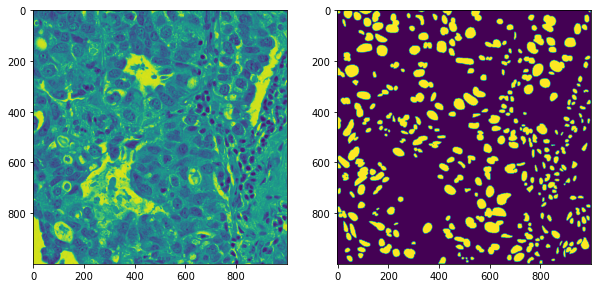

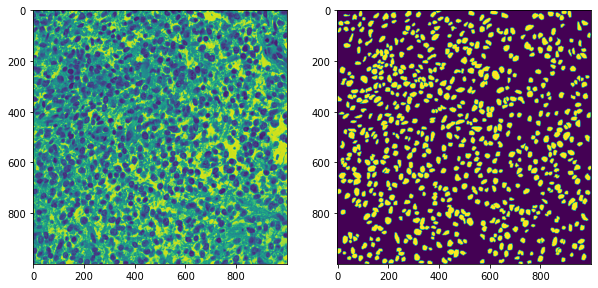

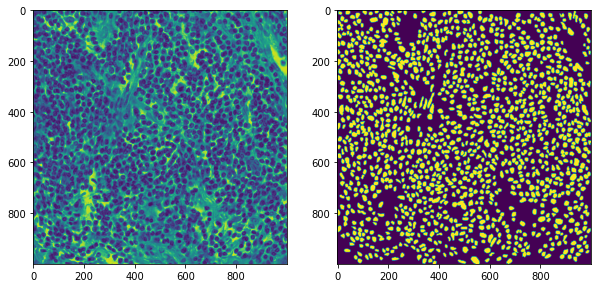

In [ ]:
for i in [3,6,12]:    #Taking training images from image  and mask folders and showing them
  fig = plt.figure(figsize=(10,15))
  ax1 = fig.add_subplot(2,2,1)
  ax1.imshow(img_list[i])
  ax2 = fig.add_subplot(2,2,2)
  ax2.imshow(msk_list[i])

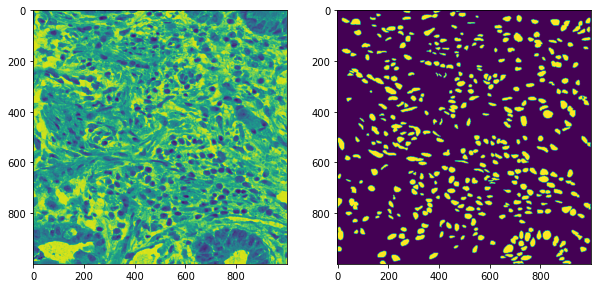

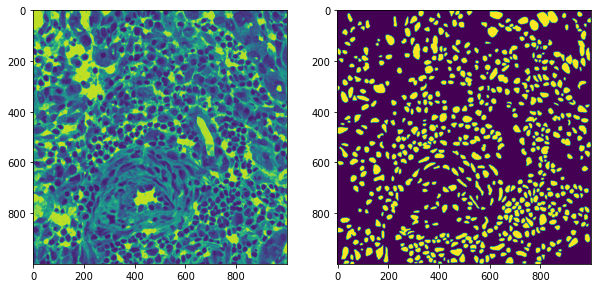

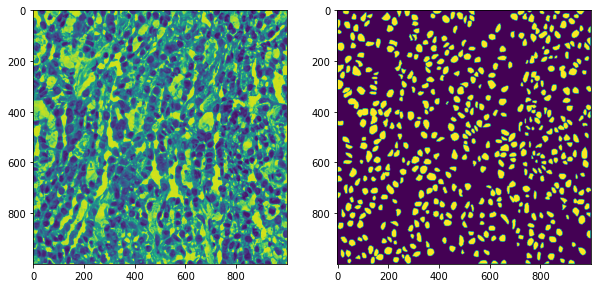

In [ ]:
for i in [3,6,12]: #Taking test images from image  and mask folders and showing them
  fig = plt.figure(figsize=(10,15))
  ax1 = fig.add_subplot(2,2,1)
  ax1.imshow(test_img_list[i])
  ax2 = fig.add_subplot(2,2,2)
  ax2.imshow(test_msk_list[i])

##Q2

In [ ]:
from keras import backend as K

In [ ]:
def Dice_coeff(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return 2*(intersection + 1.0) / ((K.sum(y_true_f) + K.sum(y_pred_f) + 1.0))

In [ ]:
def Dice_coef_loss(y_true, y_pred):
    return -Dice_coeff(y_true, y_pred)

In [ ]:
#def simple_unet_model_with_jacard(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
#Build the model
IMG_WIDTH=128
IMG_HEIGHT=128
IMG_CHANNELS=3
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = Lambda(lambda x: x / 255)(inputs)


#Contraction path
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = Dropout(0.1)(c1)
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = MaxPooling2D((2, 2))(c1)

c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = Dropout(0.1)(c2)
c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = MaxPooling2D((2, 2))(c2)

c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = Dropout(0.2)(c3)
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = MaxPooling2D((2, 2))(c3)

c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = Dropout(0.2)(c4)
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = MaxPooling2D(pool_size=(2, 2))(c4)

c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = Dropout(0.3)(c5)
c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path
u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = Dropout(0.2)(c6)
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = Dropout(0.2)(c7)
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = Dropout(0.1)(c8)
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = Dropout(0.1)(c9)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

model = Model(inputs=[inputs], outputs=[outputs])
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), metrics = ['accuracy'])

model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_3 (Lambda)              (None, 128, 128, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv2d_57 (Conv2D)             (None, 128, 128, 16  448         ['lambda_3[0][0]']               
                                )                                                                 
                                                                                            

##Q3

In [ ]:
image_dataset = np.array(img_list)
image_dataset = np.expand_dims(image_dataset, axis = 3)
mask_dataset = np.array(mask_list)
mask_dataset = np.expand_dims(image_dataset, axis = 3)
X_train = np.zeros((len(image_dataset),IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS),np.uint8)
Y_train = np.zeros((len(image_dataset),IMG_HEIGHT,IMG_WIDTH,1),bool)
X_test = np.zeros((len(image_dataset),IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS),np.uint8)
Y_test = np.zeros((len(image_dataset),IMG_HEIGHT,IMG_WIDTH,1),bool)

In [ ]:
from skimage.transform import resize
from skimage import img_as_bool
for i in range(len(image_list)):
  img = cv2.imread(image_list[i])
  img = resize(img, (IMG_HEIGHT, IMG_WIDTH,1), mode='constant', preserve_range=True)
  X_train[i] = img
  mask = cv2.imread(mask_list[i],0)
  mask = img_as_bool(resize(mask, (IMG_HEIGHT, IMG_WIDTH,1)))
  Y_train[i] = mask

In [ ]:
from skimage.transform import resize
from skimage import img_as_bool
for i in range(len(test_image_list)):
  img = cv2.imread(test_image_list[i])
  img = resize(img, (IMG_HEIGHT, IMG_WIDTH,1), mode='constant', preserve_range=True)
  X_test[i] = img
  mask = cv2.imread(test_mask_list[i],0)
  mask = img_as_bool(resize(mask, (IMG_HEIGHT, IMG_WIDTH,1)))
  Y_test[i] = mask

In [ ]:
model.fit(X_train,Y_train,epochs=25)


Epoch 1/25
1/1 [==============================] - 0s 120ms/step - loss: 0.4672 - accuracy: 0.7565
Epoch 2/25
1/1 [==============================] - 0s 95ms/step - loss: 0.4591 - accuracy: 0.7609
Epoch 3/25
1/1 [==============================] - 0s 82ms/step - loss: 0.4581 - accuracy: 0.7687
Epoch 4/25
1/1 [==============================] - 0s 79ms/step - loss: 0.4472 - accuracy: 0.7741
Epoch 5/25
1/1 [==============================] - 0s 69ms/step - loss: 0.4471 - accuracy: 0.7782
Epoch 6/25
1/1 [==============================] - 0s 72ms/step - loss: 0.4386 - accuracy: 0.7881
Epoch 7/25
1/1 [==============================] - 0s 71ms/step - loss: 0.4347 - accuracy: 0.7945
Epoch 8/25
1/1 [==============================] - 0s 72ms/step - loss: 0.4309 - accuracy: 0.7986
Epoch 9/25
1/1 [==============================] - 0s 70ms/step - loss: 0.4219 - accuracy: 0.8057
Epoch 10/25
1/1 [==============================] - 0s 72ms/step - loss: 0.4205 - accuracy: 0.8077
Epoch 11/25
1/1 [===========

In [ ]:
y_pred=model.predict(X_test)

1/1 [==============================] - 0s 20ms/step


In [ ]:
for i in range(len(y_pred)):
  for j in range(128):
    for k in range(128):
      if y_pred[i][j,k]>0.37517345:
        y_pred[i][j,k]=1
      else:
        y_pred[i][j,k]=0

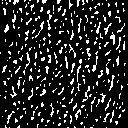

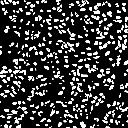

In [ ]:
new_size = (128,128)
resize_img = cv2.resize(test_msk_list[8], new_size)
cv2_imshow(y_pred[8]*255)
cv2_imshow(resize_img)

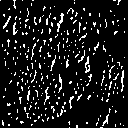

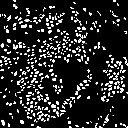

In [ ]:
new_size = (128,128)
resize_img = cv2.resize(test_msk_list[7], new_size)
cv2_imshow(y_pred[7]*255)
cv2_imshow(resize_img)

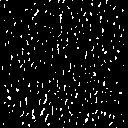

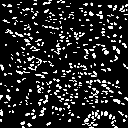

In [ ]:
new_size = (128,128)
resize_img = cv2.resize(test_msk_list[3], new_size)
cv2_imshow(y_pred[3]*255)
cv2_imshow(resize_img)

##Reference link

[link 1](https://www.youtube.com/watch?v=AZr64OxshLo)

[link 2](https://stackoverflow.com/questions/51434091/python-globbing-a-directory-of-images)

[link 3](https://stackoverflow.com/questions/30230592/loading-all-images-using-imread-from-a-given-folder)

[link 4](https://stackoverflow.com/questions/35286540/display-an-image-with-python)

[link 5](https://stackoverflow.com/questions/41793931/plotting-images-side-by-side-using-matplotlib)